In [2]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### Load the data

In [1]:
# Read the ransomeweare dataset file
import pandas as pd

# Define the file path
file_path = r'Ransomware.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter='|')

# Remove leading and trailing white spaces from the column names
df.columns = df.columns.str.strip()

# Display the first few rows of the DataFrame
print(df.head())

                                                Name  \
0  memtest.exe                                   ...   
1  ose.exe                                       ...   
2  setup.exe                                     ...   
3  DW20.EXE                                      ...   
4  dwtrig20.exe                                  ...   

                                 md5  Machine  SizeOfOptionalHeader  \
0  631ea355665f28d4707448e442fbf5b8       332                   224   
1  9d10f99a6712e28f8acd5641e3a7ea6b       332                   224   
2  4d92f518527353c0db88a70fddcfd390       332                   224   
3  a41e524f8d45f0074fd07805ff0c9b12       332                   224   
4  c87e561258f2f8650cef999bf643a731       332                   224   

   Characteristics  MajorLinkerVersion  MinorLinkerVersion  SizeOfCode  \
0              258                   9                   0      361984   
1             3330                   9                   0      130560   
2             

### Data Preprocessing

In [4]:
# Data Preprocessing
# Handle missing values
df.fillna(0, inplace=True)

# Encode categorical variables
df['Name'] = df['Name'].astype('category').cat.codes
df['md5'] = df['md5'].astype('category').cat.codes

# Split the data into features and target variable
X = df.drop('legitimate', axis=1)
y = df['legitimate']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Exploratory Data Analysis

                Name            md5        Machine  SizeOfOptionalHeader  \
count  138047.000000  138047.000000  138047.000000         138047.000000   
mean    58466.933486   69023.000000    4259.069274            225.845632   
std     36022.208962   39850.880643   10880.347245              5.121399   
min         0.000000       0.000000     332.000000            224.000000   
25%     25728.500000   34511.500000     332.000000            224.000000   
50%     60240.000000   69023.000000     332.000000            224.000000   
75%     94751.500000  103534.500000     332.000000            224.000000   
max    107487.000000  138046.000000   34404.000000            352.000000   

       Characteristics  MajorLinkerVersion  MinorLinkerVersion    SizeOfCode  \
count    138047.000000       138047.000000       138047.000000  1.380470e+05   
mean       4444.145994            8.619774            3.819286  2.425956e+05   
std        8186.782524            4.088757           11.862675  5.754485e+0

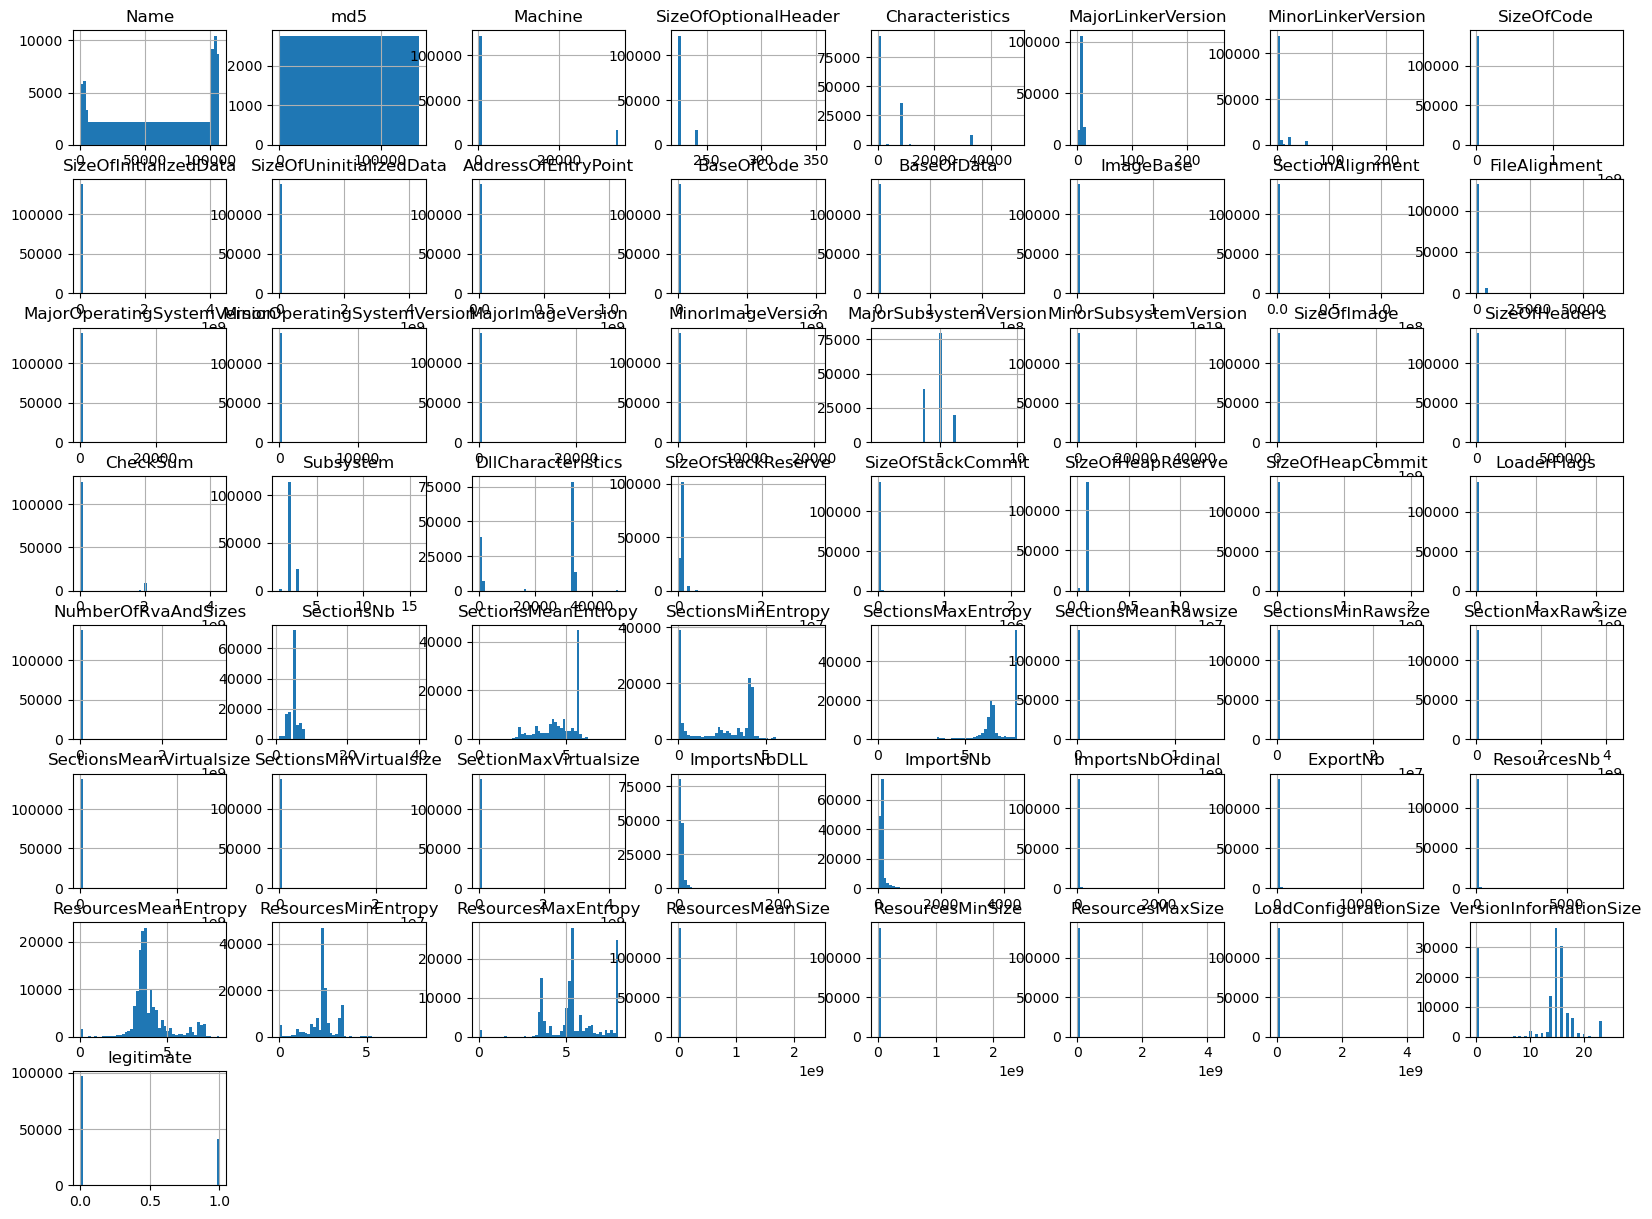

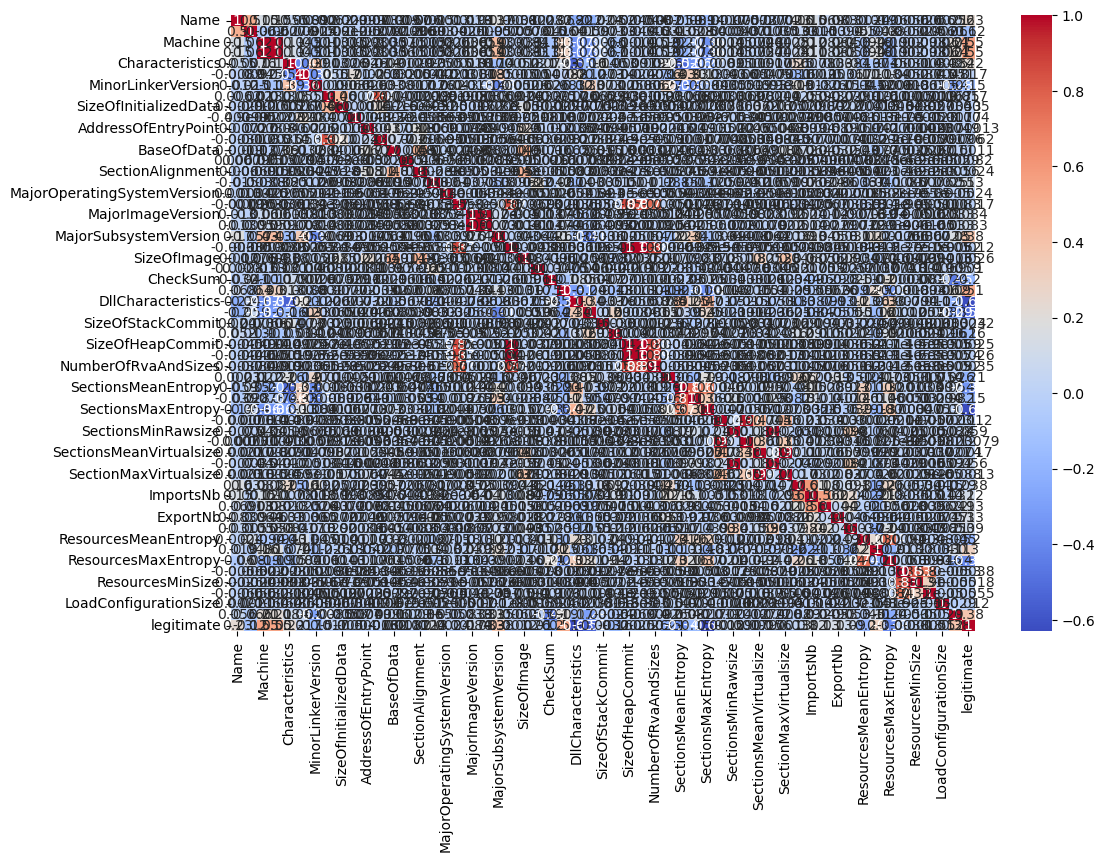

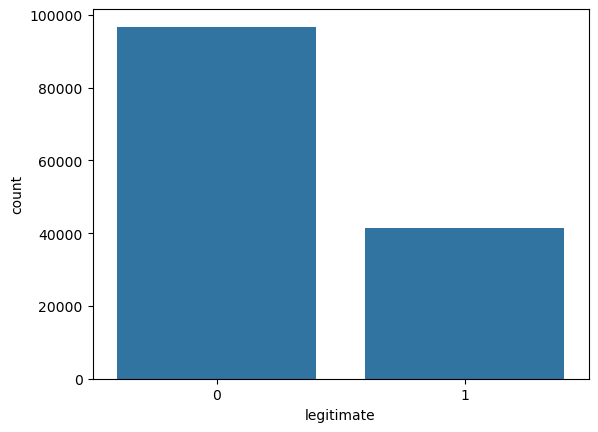

In [5]:
# Exploratory Data Analysis (EDA)
# - Summary statistics
# - Visualizations
# - Correlation analysis
# - Distribution of target variable

def summary_statistics(df):
    return df.describe()

def plot_distributions(df):
    import matplotlib.pyplot as plt
    df.hist(bins=50, figsize=(20, 15))
    plt.show()

def correlation_matrix(df):
    import seaborn as sns
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()

def target_distribution(df, target_column):
    import seaborn as sns
    sns.countplot(x=target_column, data=df)
    plt.show()

# Display the summary statistics
print(summary_statistics(df))

# Plot the distributions of the features
plot_distributions(df)

# Plot the correlation matrix
correlation_matrix(df)

# Plot the distribution of the target variable
target_distribution(df, 'legitimate')

### Feature Selection Analysis

In [6]:
"""

In this section, we will perform feature selection to identify the most important features for our model. We will use various techniques such as correlation analysis, mutual information, and recursive feature elimination (RFE).

1. **Correlation Analysis**:
    - We will compute the correlation matrix to identify features that are highly correlated with the target variable.

2. **Mutual Information**:
    - We will use mutual information to measure the dependency between each feature and the target variable.

3. **Recursive Feature Elimination (RFE)**:
    - We will use RFE with a Support Vector Classifier (SVC) to recursively remove the least important features and select the most important ones.

"""

from sklearn.feature_selection import mutual_info_classif, RFE

# 1. Correlation Analysis
correlation_matrix = df.corr()
print(correlation_matrix['legitimate'].sort_values(ascending=False))

# # 2. Mutual Information
# mutual_info = mutual_info_classif(X, y)
# mutual_info_series = pd.Series(mutual_info, index=X.columns)
# print(mutual_info_series.sort_values(ascending=False))

# # 3. Recursive Feature Elimination (RFE)
# svc = SVC(kernel="linear")
# rfe = RFE(estimator=svc, n_features_to_select=10, step=1)
# rfe.fit(X_scaled, y)
# rfe_support = rfe.support_
# rfe_ranking = rfe.ranking_

# # Display the selected features
# selected_features = X.columns[rfe_support]
# print("Selected features by RFE:", selected_features)


legitimate                     1.000000
Machine                        0.548835
SizeOfOptionalHeader           0.547498
Subsystem                      0.514352
MajorSubsystemVersion          0.380393
VersionInformationSize         0.379646
ResourcesMinEntropy            0.299112
Name                           0.228008
Characteristics                0.221956
ExportNb                       0.134408
ImportsNbOrdinal               0.128112
FileAlignment                  0.125169
ImportsNb                      0.116415
ResourcesNb                    0.090405
MajorImageVersion              0.084410
MinorImageVersion              0.083220
SectionsMinRawsize             0.059346
SectionsMinVirtualsize         0.056466
ImportsNbDLL                   0.038395
SizeOfCode                     0.017476
MajorLinkerVersion             0.017320
SizeOfHeaders                  0.010125
ImageBase                      0.008245
MajorOperatingSystemVersion    0.002402
SectionsMeanVirtualsize        0.001734


### Modelling

#### Initial Implementations

                Accuracy  Precision    Recall  F1 Score   ROC AUC
Decision Tree   0.999710   0.999522  0.999522  0.999522  0.999657
Random Forest   0.999638   0.998805  1.000000  0.999402  0.999999
SVM             0.994277   0.990081  0.991029  0.990555  0.999756
KNN             0.993770   0.987381  0.992105  0.989737  0.998159
Neural Network  0.999493   0.999402  0.998923  0.999162  0.999995
Naive Bayes     0.472691   0.364526  0.997608  0.533948  0.659396


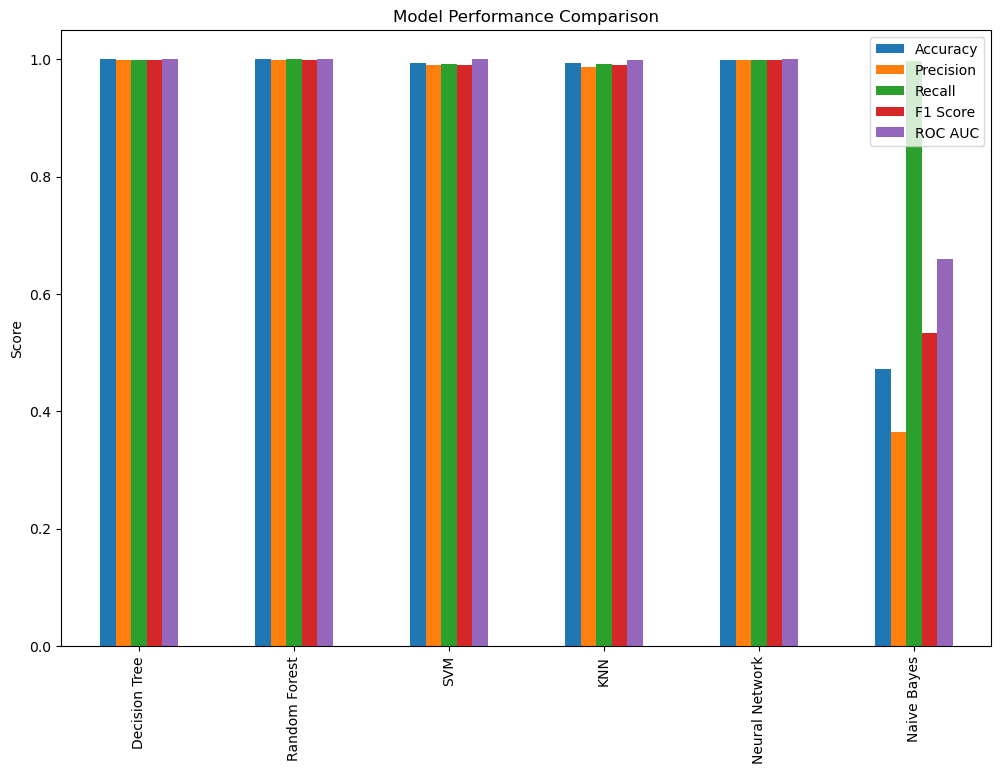

In [7]:
# Define features and target variable
X = df.drop('legitimate', axis=1)
y = df['legitimate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    }

# Comparative Analysis
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize the results
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

Calculating importance for Decision Tree...
Completed Decision Tree
Calculating importance for Random Forest...
Completed Random Forest
Calculating importance for SVM...
Completed SVM
Calculating importance for KNN...
Completed KNN
Calculating importance for Neural Network...
Completed Neural Network
Calculating importance for Naive Bayes...
Completed Naive Bayes


<Figure size 1500x800 with 0 Axes>

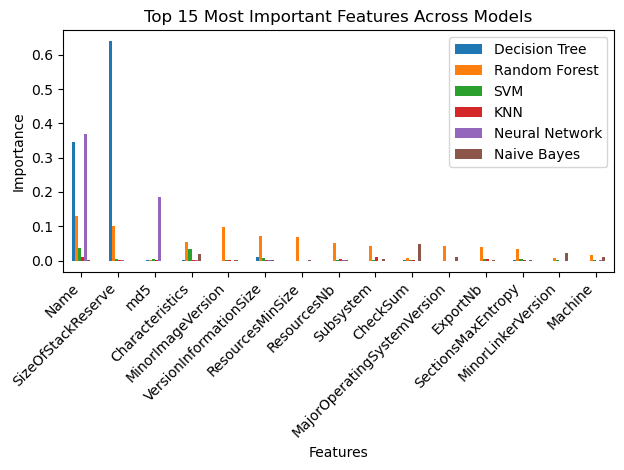


Feature Importance Values:
                             Decision Tree  Random Forest     SVM     KNN  \
Name                              0.346398       0.130183  0.0364  0.0112   
SizeOfStackReserve                0.639835       0.101584  0.0056  0.0004   
md5                               0.000074       0.001373  0.0056  0.0024   
Characteristics                   0.001269       0.055126  0.0328  0.0014   
MinorImageVersion                 0.000000       0.099171  0.0012  0.0024   
VersionInformationSize            0.009561       0.070244  0.0062  0.0024   
ResourcesMinSize                  0.000024       0.068879  0.0000  0.0000   
ResourcesNb                       0.000000       0.052550  0.0012  0.0040   
Subsystem                         0.000000       0.041422  0.0018  0.0098   
CheckSum                          0.001731       0.007118  0.0002  0.0004   
MajorOperatingSystemVersion       0.000002       0.041557  0.0000  0.0000   
ExportNb                          0.000002      

In [8]:
from sklearn.inspection import permutation_importance

# Function to get feature importances more efficiently
def get_feature_importances(model, X_train, y_train, model_name):
    # For Random Forest, use built-in feature importance
    if hasattr(model, 'feature_importances_'):
        return model.feature_importances_
    
    # For linear models like SVM with linear kernel or Logistic Regression
    elif hasattr(model, 'coef_'):
        return np.abs(model.coef_[0])  # Use absolute values for importance
    
    # For other models, use a more efficient permutation importance
    else:
        # Use a smaller subset of data for permutation importance
        sample_size = min(1000, len(X_train))  # Use at most 1000 samples
        indices = np.random.choice(len(X_train), sample_size, replace=False)
        X_sample = X_train.iloc[indices] if hasattr(X_train, 'iloc') else X_train[indices]
        y_sample = y_train.iloc[indices] if hasattr(y_train, 'iloc') else y_train[indices]
        
        # Use fewer repeats and only most important features
        result = permutation_importance(
            model, X_sample, y_sample, 
            n_repeats=5,  # Reduced from 10
            n_jobs=-1,
            random_state=42
        )
        return result.importances_mean

# Get feature importances for each model
feature_importances = {}
for name, model in models.items():
    print(f"Calculating importance for {name}...")
    feature_importances[name] = get_feature_importances(model, X_train, y_train, name)
    print(f"Completed {name}")

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame(feature_importances, index=X.columns)

# Sort features by importance (using mean importance across models)
feature_importances_df['mean_importance'] = feature_importances_df.mean(axis=1)
feature_importances_df = feature_importances_df.sort_values('mean_importance', ascending=False)
feature_importances_df = feature_importances_df.drop('mean_importance', axis=1)

# Plot only top 15 most important features
plt.figure(figsize=(15, 8))
feature_importances_df.head(15).plot(kind='bar')
plt.title('Top 15 Most Important Features Across Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the importance values
print("\nFeature Importance Values:")
print(feature_importances_df.head(15))

In [9]:
feature_importances_df.head(15)

,Decision Tree,Random Forest,SVM,KNN,Neural Network,Naive Bayes
Name,0.346398,0.130183,0.0364,0.0112,0.3690,0.0006
SizeOfStackReserve,0.639835,0.101584,0.0056,0.0004,0.0004,-0.0002
md5,0.000074,0.001373,0.0056,0.0024,0.1846,-0.0004
Characteristics,0.001269,0.055126,0.0328,0.0014,0.0024,0.0186
MinorImageVersion,0.000000,0.099171,0.0012,0.0024,0.0000,0.0006
VersionInformationSize,0.009561,0.070244,0.0062,0.0024,0.0002,0.0022
ResourcesMinSize,0.000024,0.068879,0.0000,0.0000,0.0000,0.0014
ResourcesNb,0.000000,0.052550,0.0012,0.0040,0.0008,0.0010
Subsystem,0.000000,0.041422,0.0018,0.0098,0.0000,0.0056
CheckSum,0.001731,0.007118,0.0002,0.0004,0.0000,0.0486


In [11]:
# Export the main dataframe
df.to_csv('df.csv', index=False)

# Export the feature importances dataframe
feature_importances_df.to_csv('feature_importances_df.csv')

# Export the results dataframe
results_df.to_csv('results_df.csv')

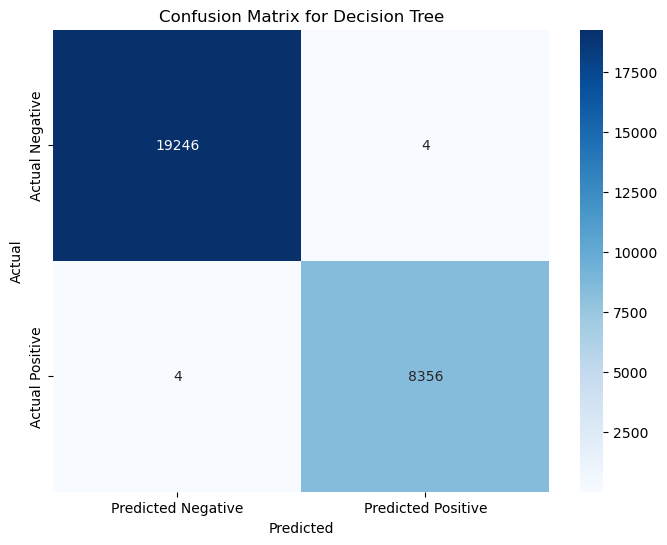

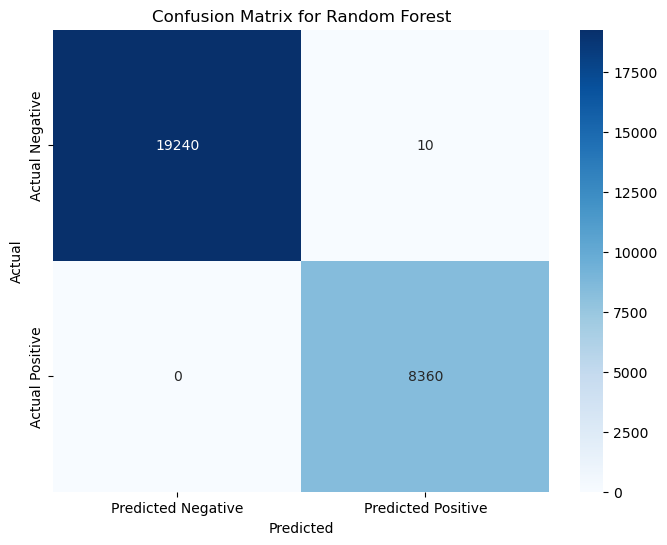

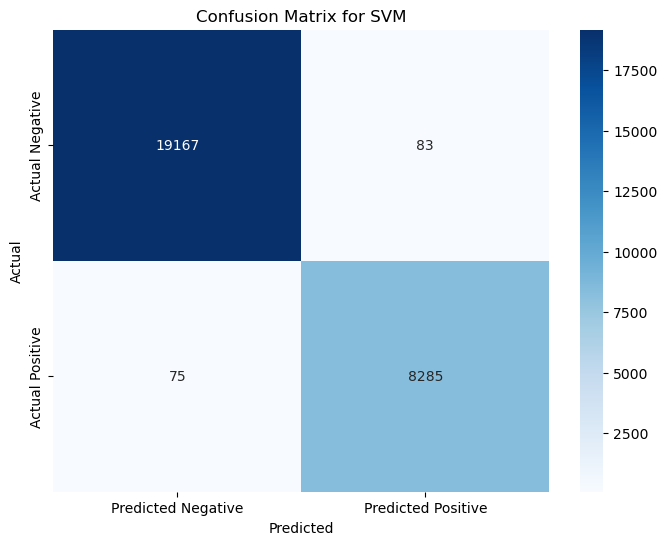

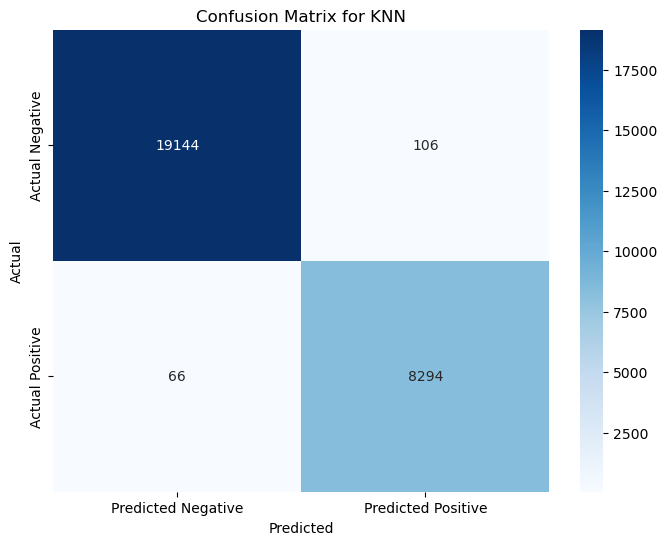

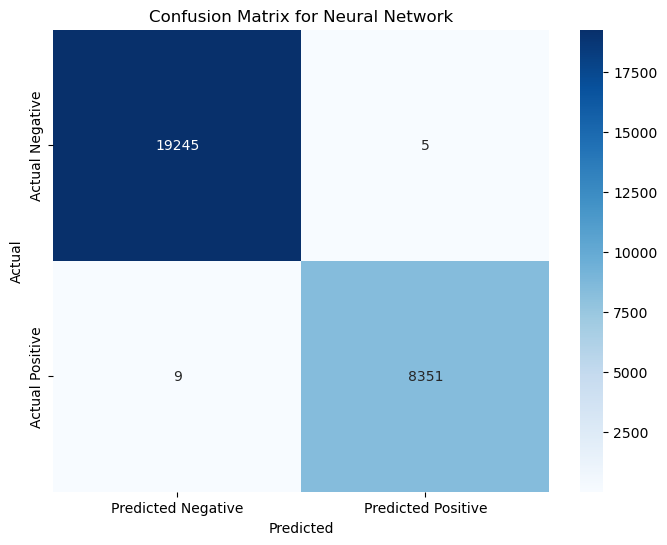

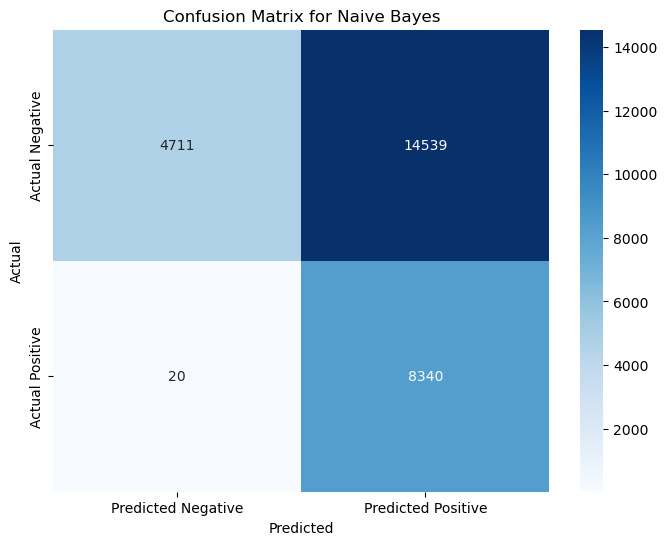

In [12]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)

In [13]:
import joblib

# Export each model as a joblib file
for name, model in models.items():
    joblib.dump(model, f'{name}.joblib')

print("Models have been exported as joblib files.")

Models have been exported as joblib files.
